# Object Detection

In [1]:
!pip install --upgrade transformers datasets torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from transformers import DetrForObjectDetection, DetrImageProcessor
from PIL import Image
import requests
import torch

model = DetrForObjectDetection.from_pretrained('facebook/detr-resnet-50')
processor = DetrImageProcessor.from_pretrained('facebook/detr-resnet-50')

image_url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image_url2 = 'https://miro.medium.com/v2/resize:fit:1400/1*v0Bm-HQxWtpbQ0Yq463uqw.jpeg'
image = Image.open(requests.get(image_url, stream=True).raw)



inputs = processor(images=image, return_tensors='pt')
outputs = model(**inputs)

target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.7)

print(results)

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'scores': tensor([0.9982, 0.9960, 0.9955, 0.9988, 0.9987], grad_fn=<IndexBackward0>), 'labels': tensor([75, 75, 63, 17, 17]), 'boxes': tensor([[ 4.0163e+01,  7.0812e+01,  1.7555e+02,  1.1798e+02],
        [ 3.3324e+02,  7.2550e+01,  3.6833e+02,  1.8766e+02],
        [-2.2602e-02,  1.1496e+00,  6.3973e+02,  4.7376e+02],
        [ 1.3241e+01,  5.2055e+01,  3.1402e+02,  4.7093e+02],
        [ 3.4540e+02,  2.3854e+01,  6.4037e+02,  3.6872e+02]],
       grad_fn=<IndexBackward0>)}]


{17: (163, 6, 70), 75: (57, 188, 173), 63: (228, 22, 108)}


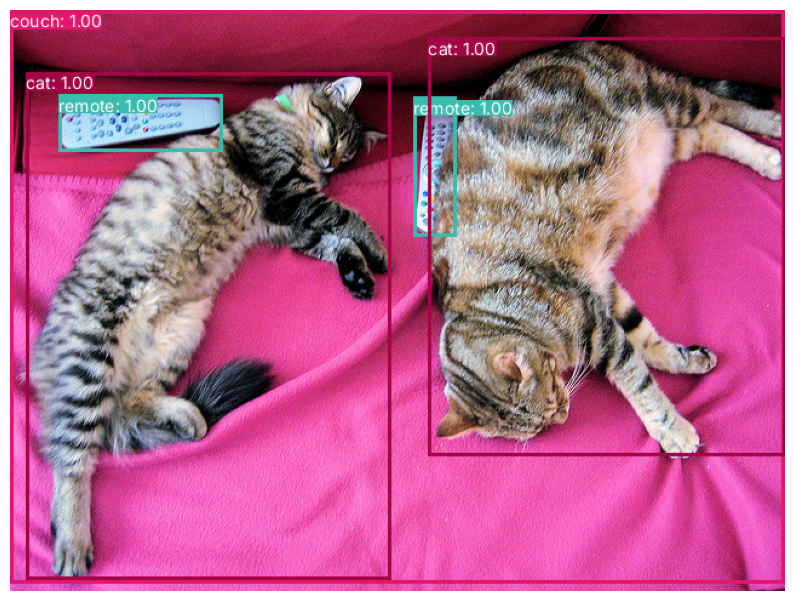

In [5]:
# Understand the code better
# How to add captions to predictions (like the name of the objects)


import matplotlib.pyplot as plt
from PIL import ImageDraw, ImageFont
import random

id2label = model.config.id2label

def visualize_predictions(image, results):
  draw = ImageDraw.Draw(image)
  boxes = results[0]['boxes']
  labels = results[0]['labels']
  scores = results[0]['scores']

  # Generate random colors for each label
  unique_labels = set(labels.tolist())
  random.seed(42)
  label_colors = {label: tuple(random.choices(range(256), k=3)) for label in unique_labels}
  print(label_colors)

  for box, label, score in zip(boxes, labels, scores):
    if score > 0.7:
      x0, y0, x1, y1 = box

      class_name = id2label[label.item()]
      color = label_colors[label.item()]
      # print(class_name)
      # print(color)

      # Draw the bounding box
      draw.rectangle(((x0, y0), (x1, y1)), outline=color, width=3)


      # Add label with background
      label_text = f"{class_name}: {score:.2f}"


      # text_size = draw.textsize(label_text) Depracataed
      font_size = 14
      font_path = "/content/drive/MyDrive/ml-codebase/Inter-VariableFont_opsz,wght.ttf"
      font = ImageFont.truetype(font_path, font_size)

      text_bbox = draw.textbbox((x0, y0), label_text, font=font) # Calculate the coordinates of the boudning box for the text
      draw.rectangle(text_bbox, fill=color) # Background for the text
      draw.text((x0, y0), label_text, fill="white", font=font) # Text on top




      # font_path = "/content/drive/MyDrive/Inter-VariableFont_opsz,wght.ttf"
      # font = ImageFont.truetype(font_path, 18)
      # draw.text((x0, y0), f"{class_name}: {score:.2f}", fill='red', font=font)


  # Display the image
  plt.figure(figsize=(10, 10))
  plt.imshow(image)
  plt.axis('off')
  plt.show()


visualize_predictions(image.copy(), results)

